# Data Cleaning and Exploratory Data Analysis Project
A project to perform data cleaning tasks, such as detection, treatment, transformation, and data visualization.

The "Vehicle Dataset 2024" dataset was found through Kaggle.com and is available under the ODC Attribution License. https://www.kaggle.com/datasets/kanchana1990/vehicle-dataset-2024

## Dataset Variables
- `name`: The full name of the vehicle, including make, model, and trim.
- `description`: A brief vehicle description, often including key features and selling points.
- `make`: The vehicle manufacturer (Ford, Toyota, BMW).
- `model`: The model name of the vehicle.
- `type`: The type of the vehicle, which is "New" for all entries in this dataset.
- `year`: The year the vehicle was manufactured.
- `price`: The price of the vehicle in USD.
- `engine`: Details about the engine, including type and specifications.
- `cylinders`: The number of cylinders in the vehicle's engine.
- `fuel`: The type of fuel the vehicle uses (Gasoline, Diesel, Electric).
- `mileage`: The vehicle's mileage, typically in miles.
- `transmission`: The transmission type (Automatic, Manual).
- `trim`: The trim level of the vehicle, indicating different feature sets or packages.
- `body`: The vehicle's body style (SUV, Sedan, Pickup Truck).
- `doors`: The number of doors on the vehicle.
- `exterior_color`: The exterior color of the vehicle.
- `interior_color`: The interior color of the vehicle.
- `drivetrain`: The vehicle's drivetrain (All-wheel Drive, Front-wheel Drive)

# Import Libraries and Dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
import statistics
warnings.filterwarnings('ignore')

sns.set_theme(style='darkgrid', palette='Dark2')

In [2]:
##-- Import Dataset --##
vehicle_df = pd.read_csv('dataset/vehicles_dataset.csv')

vehicle_df.info()
vehicle_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   type            1002 non-null   object 
 5   year            1002 non-null   int64  
 6   price           979 non-null    float64
 7   engine          1000 non-null   object 
 8   cylinders       897 non-null    float64
 9   fuel            995 non-null    object 
 10  mileage         968 non-null    float64
 11  transmission    1000 non-null   object 
 12  trim            1001 non-null   object 
 13  body            999 non-null    object 
 14  doors           995 non-null    float64
 15  exterior_color  997 non-null    object 
 16  interior_color  964 non-null    object 
 17  drivetrain      1002 non-null   o

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


# Data Cleaning 
## Detection of Duplicate Rows

In [3]:
# Detection of duplicates.
duplicates = vehicle_df.duplicated()  
dupl_counts = duplicates.value_counts() 

print(f'Total duplicate rows: {duplicates.sum()} \n')
print(f'True vs. False counts: \n {dupl_counts}')


Total duplicate rows: 24 

True vs. False counts: 
 False    978
True      24
Name: count, dtype: int64


### Inspection of Duplicate Rows
24 Rows were found to be duplicate.

In [4]:
##-- Subset duplicate rows
vehicle_df[vehicle_df.duplicated(keep=False)].sort_values('description').head()

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
304,2024 Honda CR-V Hybrid Sport,\n \n !!! CALL US AT (812) 477-620...,Honda,CR-V Hybrid,New,2024,36900.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport,SUV,4.0,Lunar Silver Metallic,Black,All-wheel Drive
637,2024 Honda CR-V Hybrid Sport,\n \n !!! CALL US AT (812) 477-620...,Honda,CR-V Hybrid,New,2024,36900.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport,SUV,4.0,Lunar Silver Metallic,Black,All-wheel Drive
398,2024 Mazda CX-90 PHEV Premium Plus,"\n \n At Walser, youll get an exce...",Mazda,CX-90 PHEV,New,2024,58399.0,DOHC 16V LEV3-SULEV30,4.0,PHEV Hybrid Fuel,4.0,Automatic,Premium Plus,SUV,4.0,Rhodium White Premium,Black,All-wheel Drive
206,2024 Mazda CX-90 PHEV Premium Plus,"\n \n At Walser, youll get an exce...",Mazda,CX-90 PHEV,New,2024,58399.0,DOHC 16V LEV3-SULEV30,4.0,PHEV Hybrid Fuel,4.0,Automatic,Premium Plus,SUV,4.0,Rhodium White Premium,Black,All-wheel Drive
158,2023 Dodge Charger SXT,\n \n F8 Green exterior and Black ...,Dodge,Charger,New,2023,37490.0,24V MPFI DOHC,6.0,Gasoline,20.0,8-Speed Automatic,SXT,Sedan,4.0,Green,Black,Rear-wheel Drive


## Treatment of Duplicate Rows
The `description` variable will be extracted into a separate dataset for later analysis since this variable can be useful for Natural Language processing. Removing the `description` variable may create additional duplicate rows. All duplicate rows will be dropped on the continued dataset.

In [5]:
vehicle_only_df = vehicle_df.drop('description', axis=1)

# Detection of duplicates cleaned dataframe
duplicates = vehicle_only_df.duplicated()  
dupl_counts = duplicates.value_counts() 

print(f'Total duplicate rows Before Dropping: {duplicates.sum()} \n')
print(f'True vs. False counts: \n {dupl_counts} \n')

vehicle_only_df.drop_duplicates(inplace=True)

duplicates = vehicle_only_df.duplicated()  
dupl_counts = duplicates.value_counts() 

print(f'Total duplicate rows After Dropping: {duplicates.sum()} \n')
print(f'True vs. False counts: \n {dupl_counts}')

Total duplicate rows Before Dropping: 31 

True vs. False counts: 
 False    971
True      31
Name: count, dtype: int64 

Total duplicate rows After Dropping: 0 

True vs. False counts: 
 False    971
Name: count, dtype: int64


## Detection of Missing Values

Total count of missing values: 223
name                0
make                0
model               0
type                0
year                0
price              23
engine              2
cylinders         103
fuel                7
mileage            32
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64
Data Sparsity: 0.013509420245956262


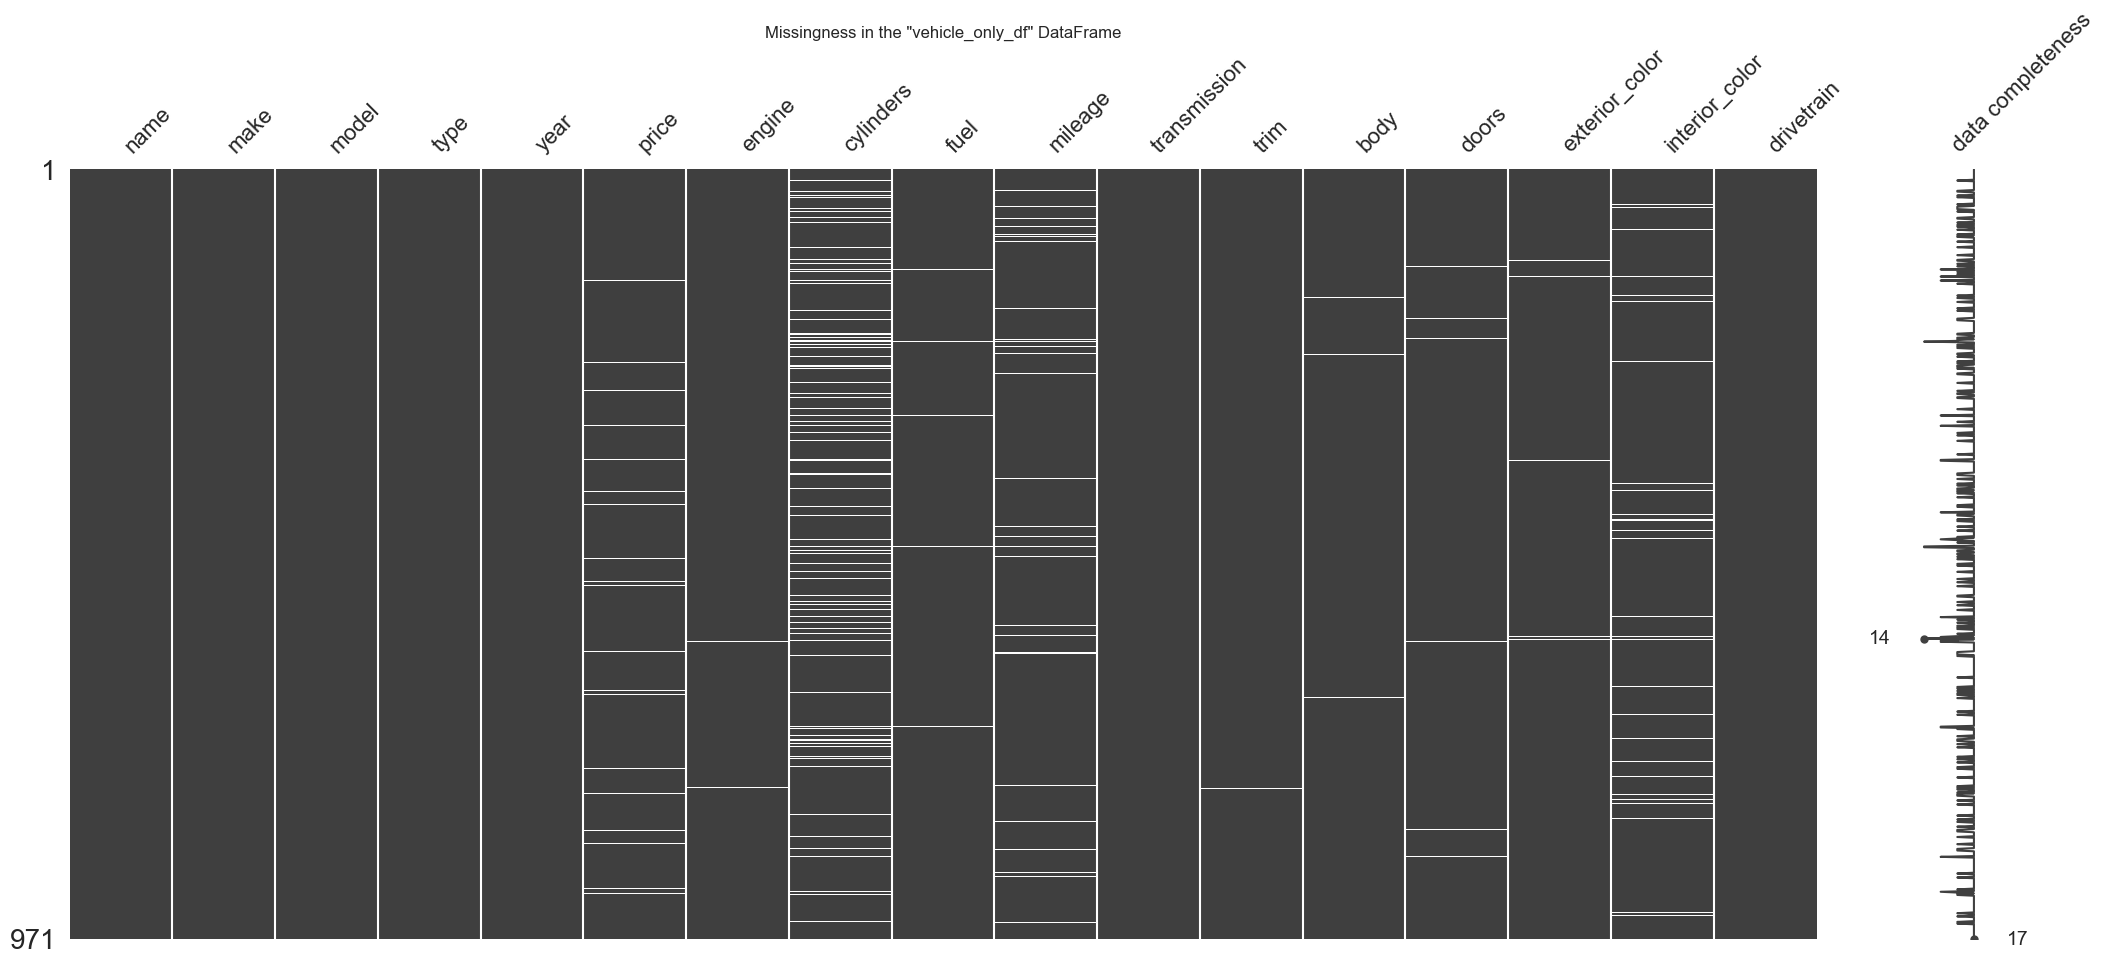

In [6]:
##-- Detection of missing values --##
print(f'Total count of missing values: {vehicle_only_df.isna().sum().sum()}')
print(vehicle_only_df.isna().sum())  # Generates the count of missing values per column.

##-- Visualization of missing values --##
print(f'Data Sparsity: {vehicle_only_df.isna().sum().sum() / (vehicle_only_df.shape[0] * vehicle_only_df.shape[1])}')
msno.matrix(vehicle_only_df, labels=True)
plt.title('Missingness in the "vehicle_only_df" DataFrame')
plt.show()

## Treatment of Missing Values
**Variables with Missing Values**:
- `price`: 23 missing,
- `engine`: 2 missing,
- `cylinders`: 103 missing,
- `fuel`: 7 missing,
- `mileage`: 32 missing,
- `transmission`: 2 missing,
- `trim`: 1 missing,
- `body`: 3 missing,
- `doors`: 7 missing,
- `exterior_color`: 5 missing, and
- `interior_color`: 38 missing.

283 total missing values present in the dataset with a **Data Sparsity** of < 2%.

### `price` Variable - Missing Values
- 23 missing values

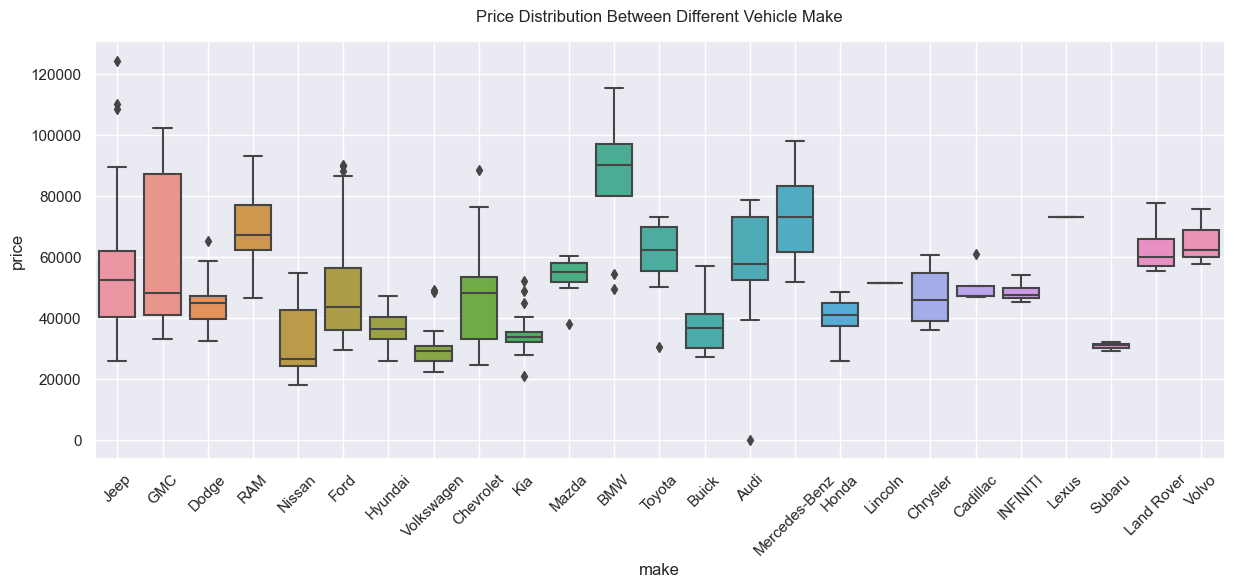

In [7]:
##-- Visual inspection of price distribution between different makes.
sns.catplot(
    x='make', y='price',
    data=vehicle_only_df.dropna(), kind='box',
    aspect=5/2
)
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Price Distribution Between Different Vehicle Make', y=1.03)
plt.show()

A glance at the distribution between different vehicle manufacturers reveals their price differences. Additionally, the distributions between different vehicle manufacturers are skewed, meaning that the best way to fill in missing values is to perform a median imputation based on `make` and `model`.

#### Impute missing values in the `price` column considering vehicle `make` and `model`.
1. Aggregate median values between make and model.
2. Create a loop to impute missing values for rows where make and model match.

In [8]:
#-- Find median based on make and model
median_vals = vehicle_only_df.groupby(['make', 'model'])['price'].median().reset_index()
print(median_vals[median_vals['price'].isna()])  # Check for missing values in the df
median_vals

              make    model  price
9              BMW      530    NaN
118  Mercedes-Benz  GLE 350    NaN


,make,model,price
0,Acura,MDX,56155.0
1,Acura,ZDX,69850.0
2,Audi,A3,39375.0
3,Audi,A5 Sportback,56105.0
4,Audi,Q5 e,73190.0
...,...,...,...
148,Volkswagen,Jetta,25923.0
149,Volkswagen,Taos,29226.0
150,Volvo,C40 Recharge Pure Electric,62240.0
151,Volvo,S60 Recharge Plug-In Hybrid,57545.0


The dataset's `BMW 530` and the `Mercedes-Benz GLE 350` came up with missing values after aggregating the median value.
Values related to these vehicles will be dropped from the dataset, and all other missing values will be imputed using the `median_vals` DataFrame.

In [9]:
##-- Drop defined rows, then impute median values --##
dropping_rows = vehicle_only_df[vehicle_only_df['model'].isin(['530', 'GLE 350'])]
vehicle_only_df.drop(dropping_rows.index, axis=0, inplace=True)


# Create a loop that imputes null values based on the vehicle model.
values = []
for i in range(vehicle_only_df.shape[0]):
    if pd.isnull(vehicle_only_df.iloc[i,5]):  # Checks if row is null on price variable
        m = vehicle_only_df.iloc[i,2]  # Extracts model name
        values.append(float(median_vals[median_vals['model']==m]['price']))  # append median value
    else:
        values.append(vehicle_only_df.iloc[i,5])  # append original price value

# Inspect missing values before and after imputation.
vehicle_only_df['price_check'] = values
print(vehicle_only_df[['price', 'price_check']].isna().sum())

price          21
price_check     0
dtype: int64


In [10]:
##-- replace 'price' with 'price_check' --##
vehicle_only_df['price'] = vehicle_only_df['price_check']
vehicle_only_df.drop('price_check', axis=1, inplace=True)
print(f"Total Missing values for 'price' variable: {vehicle_only_df['price'].isna().sum()}")
vehicle_only_df.head()

Total Missing values for 'price' variable: 0


,name,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


### `engine` Variable - Missing Values
- 2 missing values.

In [11]:
##-- Glance at 2 rows with missing values in the `engine` column --##
vehicle_only_df[vehicle_only_df['engine'].isna()]

,name,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
614,2025 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,New,2025,42150.0,NaN,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,NaN,Canyon,Black,All-wheel Drive
803,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,New,2024,73999.0,NaN,6.0,Gasoline,59.0,8-Speed Automatic,Series II,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive


Each row might have similar rows to extract the engine variable from.
We can inspect further:
- Model: `CR-V Hybrid`, and
- Model: `Wagoneer`.

In [12]:
# Subsetting for model 'CR-V Hybrid'
vehicle_only_df[vehicle_only_df['model'] == 'CR-V Hybrid']

,name,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
109,2024 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,New,2024,42005.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport Touring,SUV,4.0,Radiant Red Metallic,Black,All-wheel Drive
304,2024 Honda CR-V Hybrid Sport,Honda,CR-V Hybrid,New,2024,36900.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport,SUV,4.0,Lunar Silver Metallic,Black,All-wheel Drive
534,2024 Honda CR-V Hybrid Sport-L,Honda,CR-V Hybrid,New,2024,40355.0,16V GDI DOHC Hybrid,4.0,Hybrid,68.0,Automatic CVT,Sport-L,SUV,4.0,Platinum White Pearl,Black,All-wheel Drive
614,2025 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,New,2025,42150.0,NaN,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,NaN,Canyon,Black,All-wheel Drive
673,2024 Honda CR-V Hybrid Sport-L,Honda,CR-V Hybrid,New,2024,37505.0,16V GDI DOHC Hybrid,4.0,Hybrid,0.0,Automatic CVT,Sport-L,SUV,4.0,Platinum White Pearl,NaN,Front-wheel Drive


In [13]:
# Subsetting for model 'Wagoneer'
vehicle_only_df[vehicle_only_df['model'] == 'Wagoneer']

,name,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
6,2024 Jeep Wagoneer Base,Jeep,Wagoneer,New,2024,63862.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5.0,8-Speed Automatic,Base,SUV,4.0,Bright White Clearcoat,Black,Rear-wheel Drive
73,2024 Jeep Wagoneer Base,Jeep,Wagoneer,New,2024,63057.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Base,SUV,4.0,Metallic,Black,Four-wheel Drive
92,2024 Jeep Wagoneer Base,Jeep,Wagoneer,New,2024,60555.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Rear-wheel Drive
234,2024 Jeep Wagoneer Base,Jeep,Wagoneer,New,2024,65928.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Base,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive
250,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,New,2024,87488.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,22.0,8-Speed Automatic,Series II,SUV,4.0,Riverrock Green,Global Black,Four-wheel Drive
261,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,New,2024,72908.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Series II,SUV,4.0,Diamond Black,Black,Four-wheel Drive
399,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,New,2024,75888.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Series II,SUV,4.0,Riverrock Green,Black,Four-wheel Drive
650,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,New,2024,84935.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,1.0,8-Speed Automatic,Series II,SUV,4.0,Velvet Red Pearlcoat,Global Black,Four-wheel Drive
686,2024 Jeep Wagoneer Base,Jeep,Wagoneer,New,2024,77473.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,14.0,8-Speed Automatic,Base,SUV,4.0,Silver Zynith,Global Black,Four-wheel Drive


#### Impute using the forward fill method.
Upon quick inspection, sorting the DataFrame by `model` and `engine` will allow the use of the forward fill method to fill in missing values.

In [14]:
##-- Sort and ffill --##
vehicle_only_df.sort_values(['model', 'engine'], ascending=False, inplace=True)
vehicle_only_df['engine'].fillna(method='ffill', inplace=True)

print(f"Total Missing Values in 'engine' column: {vehicle_only_df['engine'].isna().sum()}")
print(vehicle_only_df[vehicle_only_df['model'] == 'CR-V Hybrid'][['model', 'engine']])
print(vehicle_only_df[vehicle_only_df['model'] == 'Wagoneer'][['model', 'engine']])

Total Missing Values in 'engine' column: 0
           model               engine
109  CR-V Hybrid  16V GDI DOHC Hybrid
304  CR-V Hybrid  16V GDI DOHC Hybrid
534  CR-V Hybrid  16V GDI DOHC Hybrid
673  CR-V Hybrid  16V GDI DOHC Hybrid
614  CR-V Hybrid  16V GDI DOHC Hybrid
        model                              engine
837  Wagoneer  rbo Regular Unleaded I-6 3.0 L/183
0    Wagoneer             24V GDI DOHC Twin Turbo
6    Wagoneer             24V GDI DOHC Twin Turbo
73   Wagoneer             24V GDI DOHC Twin Turbo
92   Wagoneer             24V GDI DOHC Twin Turbo
234  Wagoneer             24V GDI DOHC Twin Turbo
250  Wagoneer             24V GDI DOHC Twin Turbo
261  Wagoneer             24V GDI DOHC Twin Turbo
399  Wagoneer             24V GDI DOHC Twin Turbo
650  Wagoneer             24V GDI DOHC Twin Turbo
686  Wagoneer             24V GDI DOHC Twin Turbo
751  Wagoneer             24V GDI DOHC Twin Turbo
772  Wagoneer             24V GDI DOHC Twin Turbo
970  Wagoneer             24V

### `cylinders` variable - Missing Values
- 103 missing values

In [15]:
print(f"Total Missing Values in `cylinders` column: {vehicle_only_df['cylinders'].isna().sum()}")

##- Inspect rows where Cylinders has a missing value --##
vehicle_only_df[vehicle_only_df['cylinders'].isna()]

Total Missing Values in `cylinders` column: 103


,name,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
293,2024 BMW i7 eDrive50,BMW,i7,New,2024,110445.0,c,NaN,Electric,5.0,1-Speed Automatic,eDrive50,Sedan,4.0,Black Sapphire Metallic,Black,Rear-wheel Drive
884,2024 BMW i7 M70,BMW,i7,New,2024,195895.0,c,NaN,Electric,0.0,1-Speed Automatic,M70,Sedan,4.0,Gray Metallic,Caramel,All-wheel Drive
227,2024 BMW i5 M60,BMW,i5,New,2024,91825.0,c,NaN,Electric,7.0,1-Speed Automatic,M60,Sedan,4.0,Mineral White,Black,All-wheel Drive
419,2024 BMW i5 M60,BMW,i5,New,2024,96895.0,c,NaN,Electric,37.0,1-Speed Automatic,M60,Sedan,4.0,Black Sapphire,Black,All-wheel Drive
424,2024 BMW i5 M60,BMW,i5,New,2024,93335.0,c,NaN,Electric,3.0,1-Speed Automatic,M60,Sedan,4.0,Black Sapphire,Black,All-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2024 Mercedes-Benz EQE 350+ Base,Mercedes-Benz,EQE 350+,New,2024,79765.0,c,NaN,Electric,9.0,1-Speed Automatic,Base,Sedan,4.0,Twilight Blue Metallic,Gray,Rear-wheel Drive
893,2025 Honda CR-V EX-L,Honda,CR-V,New,2025,38305.0,d>\n\n \n <dt>VIN</dt>\n 7FARS4H71SE...,NaN,Gasoline,0.0,Automatic CVT,EX-L,SUV,NaN,Urban Gray Pearl,Black,All-wheel Drive
14,2024 Chevrolet Blazer EV 2LT,Chevrolet,Blazer EV,New,2024,51695.0,c,NaN,Electric,4.0,1-Speed Automatic,2LT,SUV,4.0,Sterling Gray Metallic,Black,All-wheel Drive
28,2024 Chevrolet Blazer EV 2LT,Chevrolet,Blazer EV,New,2024,52190.0,c,NaN,Electric,6.0,1-Speed Automatic,2LT,SUV,4.0,Radiant Red,Black,All-wheel Drive


- At first glance, vehicles that are EVs, where the fuel variable equals `Electric`, show to have missing values in the cylinders variable.
- There seems to be more missing values where fuel is different than `Electric`.

In [16]:
##-- Subset rows based on missing values in the cylinder column, but fuel is not `Electric` Value. --##
vehicle_only_df[(vehicle_only_df['cylinders'].isna()) & (vehicle_only_df['fuel'] != 'Electric')]

,name,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
128,2024 Subaru Solterra Premium,Subaru,Solterra,New,2024,39934.0,c,NaN,NaN,5.0,1-Speed Automatic,Premium,SUV,4.0,Galactic,Black,All-wheel Drive
219,2024 Honda Prologue TOURING,Honda,Prologue,New,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,BX,Gray,All-wheel Drive
315,2024 Honda Prologue TOURING,Honda,Prologue,New,2024,56550.0,c,NaN,NaN,1.0,1-Speed Automatic,TOURING,SUV,4.0,Gray,Black,All-wheel Drive
489,2024 Honda Prologue TOURING,Honda,Prologue,New,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,Pearl,Black,All-wheel Drive
490,2024 Honda Prologue TOURING,Honda,Prologue,New,2024,55800.0,c,NaN,NaN,NaN,1-Speed Automatic,TOURING,SUV,4.0,Gray,Black,All-wheel Drive
726,2024 Jaguar I-PACE EV400 R-Dynamic HSE,Jaguar,I-PACE,New,2024,77053.0,d>\n\n \n <dt>VIN</dt>\n SADHM2S12R1...,NaN,NaN,8.0,Automatic,EV400 R-Dynamic HSE,SUV,5.0,Santorini Black,Ebony,All-wheel Drive
610,2024 Chevrolet Equinox EV RS,Chevrolet,Equinox EV,New,2024,47495.0,<dt>VIN</dt>\n 3GN7DNRPXRS232327,NaN,NaN,0.0,Automatic,RS,SUV,NaN,Sterling Gray Metallic,Black,Front-wheel Drive
893,2025 Honda CR-V EX-L,Honda,CR-V,New,2025,38305.0,d>\n\n \n <dt>VIN</dt>\n 7FARS4H71SE...,NaN,Gasoline,0.0,Automatic CVT,EX-L,SUV,NaN,Urban Gray Pearl,Black,All-wheel Drive


In [17]:
##-- Subset for rows on defined model names --##
vehicle_only_df[vehicle_only_df['model'].isin([
    'Solterra', 'Prologue', 'I-PACE', 'Equinox EV', 'CR-V'
])][['make', 'model', 'cylinders', 'fuel']].sort_values('make')

,make,model,cylinders,fuel
610,Chevrolet,Equinox EV,NaN,NaN
219,Honda,Prologue,NaN,NaN
315,Honda,Prologue,NaN,NaN
489,Honda,Prologue,NaN,NaN
490,Honda,Prologue,NaN,NaN
257,Honda,CR-V,4.0,Hybrid
893,Honda,CR-V,NaN,Gasoline
950,Honda,CR-V,4.0,Gasoline
726,Jaguar,I-PACE,NaN,NaN
128,Subaru,Solterra,NaN,NaN


- Judging by the model name, the Chevrolet Equinox EV is an Electric Fuel type.
- From the Honda website, the Honda Prologue is also an EV.
- Comparing the next similar row, the missing value for the Honda CR-V is the `4.0` cylinder, and the fuel is `Gasoline`.
- The Jaguar I-PACE is an EV.
- and the Subaru Solterra Premium is an EV.

#### Impute the cylinder column and some fuel columns.
1. Impute rows with a missing value in the cylinders column and a discrepancy in the fuel column.
2. Afterward, use the `.fillna()` function to fill the rest of the columns with the value of `0.0` to represent EVs. 

In [18]:
##-- Fill missing value for CR-V
vehicle_only_df.loc[893, 'cylinders'] = 4.0

##-- Define rows that are supposed to be electric vehicles --##
rows = [
    128, 219, 315, 489, 490, 610, 726
]
for i in rows:
    vehicle_only_df.loc[i, 'cylinders'] = 0.0
    vehicle_only_df.loc[i, 'fuel'] = 'Electric'

# print rows to inspect
vehicle_only_df[vehicle_only_df['model'].isin([
    'Solterra', 'Prologue', 'I-PACE', 'Equinox EV', 'CR-V'
])][['make', 'model', 'cylinders', 'fuel']].sort_values('make')

,make,model,cylinders,fuel
610,Chevrolet,Equinox EV,0.0,Electric
219,Honda,Prologue,0.0,Electric
315,Honda,Prologue,0.0,Electric
489,Honda,Prologue,0.0,Electric
490,Honda,Prologue,0.0,Electric
257,Honda,CR-V,4.0,Hybrid
893,Honda,CR-V,4.0,Gasoline
950,Honda,CR-V,4.0,Gasoline
726,Jaguar,I-PACE,0.0,Electric
128,Subaru,Solterra,0.0,Electric


In [19]:
##-- Fill remaining missing values in cylinders columns with 0.0 for EVs --##
vehicle_only_df['cylinders'].fillna(0.0, inplace=True)

print(f"Total Missing in `cylinders` Column: {vehicle_only_df['cylinders'].isna().sum()}")

Total Missing in `cylinders` Column: 0


### `fuel` variable - Missing Values
- All 7 missing values were imputed from handling the `cylinders` column.

In [20]:
##-- Count missing values in column. --##
print(f"Total Missing Values in `fuel` Column: {vehicle_only_df['fuel'].isna().sum()}")

Total Missing Values in `fuel` Column: 0


### `mileage` variable - Missing Values

In [21]:
##-- Missing value count in mileage variable --##
print(f"Total Missing Values in `mileage` Column: {vehicle_only_df['mileage'].isna().sum()}")

## Print summary statistics of mileage column.
print(vehicle_only_df['mileage'].describe())
## subset for rows with missing values in mileage column
vehicle_only_df[vehicle_only_df['mileage'].isna()].head(10)

Total Missing Values in `mileage` Column: 32
count     937.000000
mean       70.919957
std       515.657353
min         0.000000
25%         4.000000
50%         8.000000
75%        13.000000
max      9711.000000
Name: mileage, dtype: float64


,name,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
217,2024 Jeep Wrangler 4xe Sport,Jeep,Wrangler 4xe,New,2024,50755.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,NaN,8-Speed Automatic,Sport,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive
594,2024 Jeep Wrangler 4xe Sport,Jeep,Wrangler 4xe,New,2024,51350.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,NaN,8-Speed Automatic,Sport,SUV,4.0,Anvil Clearcoat,Black,Four-wheel Drive
596,2023 Jeep Wrangler 4xe Sahara,Jeep,Wrangler 4xe,New,2023,63715.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,NaN,8-Speed Automatic,Sahara,SUV,4.0,Silver Zynith Clearcoat,Black,Four-wheel Drive
607,2024 Jeep Wagoneer L Series II,Jeep,Wagoneer L,New,2024,83845.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Series II,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive
73,2024 Jeep Wagoneer Base,Jeep,Wagoneer,New,2024,63057.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Base,SUV,4.0,Metallic,Black,Four-wheel Drive
234,2024 Jeep Wagoneer Base,Jeep,Wagoneer,New,2024,65928.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Base,SUV,4.0,Bright White Clearcoat,Black,Four-wheel Drive
261,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,New,2024,72908.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Series II,SUV,4.0,Diamond Black,Black,Four-wheel Drive
399,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,New,2024,75888.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,NaN,8-Speed Automatic,Series II,SUV,4.0,Riverrock Green,Black,Four-wheel Drive
885,2024 Hyundai Tucson Hybrid SEL Convenience,Hyundai,Tucson Hybrid,New,2024,37215.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,NaN,6-Speed Automatic,SEL Convenience,SUV,4.0,Black Pearl,Gray,All-wheel Drive
225,2024 Volkswagen Taos 1.5T S,Volkswagen,Taos,New,2024,25895.0,16V GDI DOHC Turbo,4.0,Gasoline,NaN,7-Speed DSGA? Automatic w/ 4MO,1.5T S,SUV,4.0,Deep Black Pearl Effect,Black,All-wheel Drive


- Judging by how new these vehicles are, the assumption can be made that the total mileage on these vehicles would be low.
- Inspecting the mean (mean = `70.92`) and the median (median = `8.0`) of the mileage variable, the distribution is right-skewed.
- With the right-skewed distribution and the fact that these are new vehicles, it makes sense to use the median to impute these missing values.

#### Impute the `mileage` variable using the median.
- The median is `8.0` for the mileage column.

In [22]:
##-- Fill missing value with median value --##
vehicle_only_df['mileage'].fillna(8.0, inplace=True)

##-- Missing value count in mileage variable --##
print(f"Total Missing Values in `mileage` Column: {vehicle_only_df['mileage'].isna().sum()}")

Total Missing Values in `mileage` Column: 0


### `transmission` variable - Missing Values
- 2 missing values

In [23]:
##-- Count missing values in the `transmission` column --##
print(f"Total Missing Values in `transmission` Column: {vehicle_only_df['transmission'].isna().sum()}")

# Visually inspect rows with the missing value
vehicle_only_df[vehicle_only_df['transmission'].isna()]

Total Missing Values in `transmission` Column: 2


,name,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
940,2024 Ford Transit-350 148 WB Medium Roof Cargo,Ford,Transit-350,New,2024,52530.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,1.0,NaN,148 WB Medium Roof Cargo,Cargo Van,3.0,White,NaN,Rear-wheel Drive
725,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,New,2024,111245.0,c,0.0,Electric,10.0,NaN,Base 4MATIC,Sedan,4.0,White,Black,All-wheel Drive


In [24]:
##-- Subset rows by defined model name --##
vehicle_only_df[vehicle_only_df['model'].isin(['Transit-350', 'EQS 450'])]

,name,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
897,2024 Ford Transit-350 Base,Ford,Transit-350,New,2024,74391.0,"6 port/direct injection, DOHC, variable valve ...",6.0,Gasoline,85.0,Automatic,Base,Cargo Van,3.0,Oxford White,gray,All-wheel Drive
940,2024 Ford Transit-350 148 WB Medium Roof Cargo,Ford,Transit-350,New,2024,52530.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,1.0,NaN,148 WB Medium Roof Cargo,Cargo Van,3.0,White,NaN,Rear-wheel Drive
793,2023 Ford Transit-350 Base,Ford,Transit-350,New,2023,57000.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5581.0,10-Speed Automatic,Base,Cargo Van,3.0,White,Gray,Rear-wheel Drive
805,2023 Ford Transit-350,Ford,Transit-350,New,2023,54525.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,10-Speed Automatic,NaN,Cargo Van,3.0,Oxford White,Dark Palazzo Gray,Rear-wheel Drive
142,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,New,2024,112702.5,c,0.0,Electric,8.0,Automatic,Base 4MATIC,Sedan,4.0,Graphite Gray Metallic,Gray,All-wheel Drive
146,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,New,2024,109545.0,c,0.0,Electric,10.0,1-Speed Automatic,Base 4MATIC,SUV,4.0,Black,Black,All-wheel Drive
253,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,New,2024,110395.0,c,0.0,Electric,5.0,Automatic,Base 4MATIC,Sedan,4.0,Obsidian Black Metallic,Black,All-wheel Drive
328,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,New,2024,112702.5,c,0.0,Electric,10.0,Automatic,Base 4MATIC,Sedan,4.0,Obsidian Black Metallic,Black,All-wheel Drive
372,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,New,2024,112702.5,c,0.0,Electric,4.0,Automatic,Base 4MATIC,Sedan,4.0,Polar White,Macchiato Beige,All-wheel Drive
373,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,New,2024,114850.0,c,0.0,Electric,8.0,1-Speed Automatic,Base 4MATIC,SUV,4.0,NaN,Black,All-wheel Drive


- Similar vehicle models look like they are Automatic Transmission

#### Impute the `transmission` variable by filling in.
- Using `.fillna()` the missing values will be imputed with the string value of `'Automatic'`

In [25]:
# Impute using .fillna()
vehicle_only_df['transmission'].fillna('Automatic', inplace=True)

##-- Count missing values in the `transmission` column --##
print(f"Total Missing Values in `transmission` Column: {vehicle_only_df['transmission'].isna().sum()}")

Total Missing Values in `transmission` Column: 0


### `trim` variable - Missing Values
- 1 missing value.

In [26]:
##-- Count missing values in the `trim` column --##
print(f"Total Missing Values in `trim` Column: {vehicle_only_df['trim'].isna().sum()}")

##- Visualize row with missing value --##
vehicle_only_df[vehicle_only_df['trim'].isna()]

Total Missing Values in `trim` Column: 1


,name,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
805,2023 Ford Transit-350,Ford,Transit-350,New,2023,54525.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,10-Speed Automatic,NaN,Cargo Van,3.0,Oxford White,Dark Palazzo Gray,Rear-wheel Drive


In [27]:
##-- Subset rows that are `Transit-350` --##
vehicle_only_df[vehicle_only_df['model'] == 'Transit-350']

,name,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
897,2024 Ford Transit-350 Base,Ford,Transit-350,New,2024,74391.0,"6 port/direct injection, DOHC, variable valve ...",6.0,Gasoline,85.0,Automatic,Base,Cargo Van,3.0,Oxford White,gray,All-wheel Drive
940,2024 Ford Transit-350 148 WB Medium Roof Cargo,Ford,Transit-350,New,2024,52530.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,1.0,Automatic,148 WB Medium Roof Cargo,Cargo Van,3.0,White,NaN,Rear-wheel Drive
793,2023 Ford Transit-350 Base,Ford,Transit-350,New,2023,57000.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,5581.0,10-Speed Automatic,Base,Cargo Van,3.0,White,Gray,Rear-wheel Drive
805,2023 Ford Transit-350,Ford,Transit-350,New,2023,54525.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,10-Speed Automatic,NaN,Cargo Van,3.0,Oxford White,Dark Palazzo Gray,Rear-wheel Drive


Comparing all rows that are `Transit-350` the `'Base'` trim is likely the missing value for the row.

#### Impute `trim` by with `.fillna()`


In [28]:
##-- Impute `trim` column --##
vehicle_only_df['trim'].fillna('Base', inplace=True)

##-- Count missing values in the `trim` column --##
print(f"Total Missing Values in `trim` Column: {vehicle_only_df['trim'].isna().sum()}")

Total Missing Values in `trim` Column: 0


### `body` variable - Missing Values
- 3 missing values.

In [29]:
##-- Count missing values in the `body` column --##
print(f"Total Missing Values in `body` Column: {vehicle_only_df['body'].isna().sum()}")

##-- Subset for rows with missing values --##
vehicle_only_df[vehicle_only_df['body'].isna()]

Total Missing Values in `body` Column: 3


,name,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
687,2024 INFINITI QX50 SPORT,INFINITI,QX50,New,2024,49404.0,ER,4.0,Gasoline,7.0,(CVT) CONT VAR.,SPORT,NaN,4.0,Radiant White,Monaco Red,Front-wheel Drive
164,2024 Dodge Hornet R/T EAWD,Dodge,Hornet,New,2024,41497.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,11.0,6-Speed Automatic,R/T EAWD,NaN,4.0,Hot Tamale,Black,All-wheel Drive
235,2024 Dodge Hornet R/T EAWD,Dodge,Hornet,New,2024,41036.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,5.0,6-Speed Automatic,R/T EAWD,NaN,4.0,8 Ball,Black,All-wheel Drive


In [30]:
##-- Subset by defined models and count unique values --##
vehicle_only_df[vehicle_only_df['model'].isin(['QX50', 'Hornet'])]['body'].value_counts()

body
SUV    64
Name: count, dtype: int64

- By subsetting to only include the `QX50` and the `Hornet`, the only value in the `body` column is `'SUV'`.
- It makes sense to impute all rows with the value `'SUV'`.

#### Impute `body` using `.fillna()`

In [31]:
##-- Impute using `.fillna()` --##
vehicle_only_df['body'].fillna('SUV', inplace=True)

##-- Count missing values in the `trim` column --##
print(f"Total Missing Values in `trim` Column: {vehicle_only_df['trim'].isna().sum()}")

Total Missing Values in `trim` Column: 0


### `doors` variable - Missing Values
- 7 Missing Values.

In [32]:
##-- Count missing values in the `doors` column --##
print(f"Total Missing Values in `doors` Column: {vehicle_only_df['doors'].isna().sum()}")

##-- Subset for rows with missing values --##
vehicle_only_df[vehicle_only_df['doors'].isna()]

Total Missing Values in `doors` Column: 7


,name,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
857,2025 Chevrolet Trax ACTIV,Chevrolet,Trax,New,2025,26190.0,der,6.0,Gasoline,1.0,Automatic,ACTIV,SUV,NaN,Summit White,Black,Front-wheel Drive
124,2024 Hyundai Santa Fe Calligraphy,Hyundai,Santa Fe,New,2024,49905.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,Calligraphy,SUV,NaN,Green,Black,All-wheel Drive
190,2024 Hyundai Santa Fe XRT,Hyundai,Santa Fe,New,2024,42455.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,XRT,SUV,NaN,Shimmering Silver,Black,All-wheel Drive
215,2024 Hyundai Santa Fe SE 2.4,Hyundai,Santa Fe,New,2024,38100.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,SE 2.4,SUV,NaN,White,Gray,All-wheel Drive
610,2024 Chevrolet Equinox EV RS,Chevrolet,Equinox EV,New,2024,47495.0,<dt>VIN</dt>\n 3GN7DNRPXRS232327,0.0,Electric,0.0,Automatic,RS,SUV,NaN,Sterling Gray Metallic,Black,Front-wheel Drive
614,2025 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,New,2025,42150.0,16V GDI DOHC Hybrid,4.0,Gasoline,1.0,1-Speed CVT with Overdrive,Sport Touring,SUV,NaN,Canyon,Black,All-wheel Drive
893,2025 Honda CR-V EX-L,Honda,CR-V,New,2025,38305.0,d>\n\n \n <dt>VIN</dt>\n 7FARS4H71SE...,4.0,Gasoline,0.0,Automatic CVT,EX-L,SUV,NaN,Urban Gray Pearl,Black,All-wheel Drive


In [33]:
##-- Subset for rows on defined vehicle models --##
vehicle_only_df[vehicle_only_df['model'].isin(['Trax', 'Santa Fe', 'Equinox EV', 'CR-V', 'CR-V Hybrid'])]

,name,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
857,2025 Chevrolet Trax ACTIV,Chevrolet,Trax,New,2025,26190.0,der,6.0,Gasoline,1.0,Automatic,ACTIV,SUV,NaN,Summit White,Black,Front-wheel Drive
418,2024 Chevrolet Trax LT,Chevrolet,Trax,New,2024,24680.0,12V GDI DOHC Turbo,3.0,Gasoline,5.0,6-Speed Automatic,LT,SUV,4.0,Cayenne Orange Metallic,Jet Black,Front-wheel Drive
124,2024 Hyundai Santa Fe Calligraphy,Hyundai,Santa Fe,New,2024,49905.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,Calligraphy,SUV,NaN,Green,Black,All-wheel Drive
190,2024 Hyundai Santa Fe XRT,Hyundai,Santa Fe,New,2024,42455.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,XRT,SUV,NaN,Shimmering Silver,Black,All-wheel Drive
215,2024 Hyundai Santa Fe SE 2.4,Hyundai,Santa Fe,New,2024,38100.0,Turbo DOHC,4.0,Gasoline,1.0,Automatic,SE 2.4,SUV,NaN,White,Gray,All-wheel Drive
610,2024 Chevrolet Equinox EV RS,Chevrolet,Equinox EV,New,2024,47495.0,<dt>VIN</dt>\n 3GN7DNRPXRS232327,0.0,Electric,0.0,Automatic,RS,SUV,NaN,Sterling Gray Metallic,Black,Front-wheel Drive
109,2024 Honda CR-V Hybrid Sport Touring,Honda,CR-V Hybrid,New,2024,42005.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport Touring,SUV,4.0,Radiant Red Metallic,Black,All-wheel Drive
304,2024 Honda CR-V Hybrid Sport,Honda,CR-V Hybrid,New,2024,36900.0,16V GDI DOHC Hybrid,4.0,Hybrid,1.0,Automatic CVT,Sport,SUV,4.0,Lunar Silver Metallic,Black,All-wheel Drive
534,2024 Honda CR-V Hybrid Sport-L,Honda,CR-V Hybrid,New,2024,40355.0,16V GDI DOHC Hybrid,4.0,Hybrid,68.0,Automatic CVT,Sport-L,SUV,4.0,Platinum White Pearl,Black,All-wheel Drive
673,2024 Honda CR-V Hybrid Sport-L,Honda,CR-V Hybrid,New,2024,37505.0,16V GDI DOHC Hybrid,4.0,Hybrid,0.0,Automatic CVT,Sport-L,SUV,4.0,Platinum White Pearl,NaN,Front-wheel Drive


- All vehicles are SUVs and are likely `4.0` door vehicles.
- Imputing all missing values in the `doors` column with `4.0` makes sense.

#### Impute `doors` using `.fillna()`

In [34]:
##-- Impute using `.fillna()` --##
vehicle_only_df['doors'].fillna(4.0, inplace=True)

##-- Count missing values in the `doors` column --##
print(f"Total Missing Values in `doors` Column: {vehicle_only_df['doors'].isna().sum()}")

Total Missing Values in `doors` Column: 0


### `exterior_color` variable - Missing Values
- 5 missing values.

In [35]:
##-- Count missing values in the `exterior_color` column --##
print(f"Total Missing Values in `exterior_color` Column: {vehicle_only_df['exterior_color'].isna().sum()}")

##-- Subset rows with missing values --##
vehicle_only_df[vehicle_only_df['exterior_color'].isna()]

Total Missing Values in `exterior_color` Column: 5


,name,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
137,2024 Acura ZDX A-SPEC,Acura,ZDX,New,2024,69850.0,c,0.0,Electric,0.0,Automatic,A-SPEC,SUV,4.0,NaN,NaN,All-wheel Drive
117,2024 Jeep Wrangler 4-Door Sahara 4x4,Jeep,Wrangler,New,2024,59456.0,"ar 3.6L V-6 DOHC, variable valve control, regu...",6.0,Gasoline,15.0,Automatic,4-Door Sahara 4x4,SUV,4.0,NaN,Black,Four-wheel Drive
608,2023 Mercedes-Benz Sprinter 2500 High Roof,Mercedes-Benz,Sprinter 2500,New,2023,58665.0,"gasoline direct injection, DOHC, variable valv...",4.0,Gasoline,0.0,Automatic,High Roof,Cargo Van,3.0,NaN,NaN,Rear-wheel Drive
612,2024 Mercedes-Benz Sprinter 2500 High Roof,Mercedes-Benz,Sprinter 2500,New,2024,65129.0,"diesel direct injection, DOHC, intercooled tur...",4.0,Diesel,0.0,Automatic,High Roof,Pickup Truck,3.0,NaN,NaN,Rear-wheel Drive
373,2024 Mercedes-Benz EQS 450 Base 4MATIC,Mercedes-Benz,EQS 450,New,2024,114850.0,c,0.0,Electric,8.0,1-Speed Automatic,Base 4MATIC,SUV,4.0,NaN,Black,All-wheel Drive


In [36]:
##-- Value count exterior colors --##
vehicle_only_df['exterior_color'].value_counts()

exterior_color
Bright White Clearcoat       80
Black                        29
White                        28
Gray                         27
Diamond Black                24
                             ..
Carbon Blue                   1
Celestial Silver Metallic     1
Supersonic Red                1
Magnetic Gray Metallic        1
Granite                       1
Name: count, Length: 263, dtype: int64

- The Mode of the `exterior_color` variable is `'Bright White Clearcoat'`.
- It makes sense to impute missing values with the mode.

#### Impute `exterior_color` using `.fillna()`

In [37]:
##-- Impute using `.fillna()` --##
vehicle_only_df['exterior_color'].fillna('Bright White Clearcoat', inplace=True)

##-- Count missing values in the `exterior_color` column --##
print(f"Total Missing Values in `exterior_color` Column: {vehicle_only_df['exterior_color'].isna().sum()}")

Total Missing Values in `exterior_color` Column: 0


### `interior_color` variable - Missing Values
- 38 Missing Values

In [38]:
##-- Count missing values in the `interior_color` column --##
print(f"Total Missing Values in `interior_color` Column: {vehicle_only_df['interior_color'].isna().sum()}")

##-- Subset rows with missing values --##
vehicle_only_df[vehicle_only_df['interior_color'].isna()].head(10)

Total Missing Values in `interior_color` Column: 38


,name,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
137,2024 Acura ZDX A-SPEC,Acura,ZDX,New,2024,69850.0,c,0.0,Electric,0.0,Automatic,A-SPEC,SUV,4.0,Bright White Clearcoat,NaN,All-wheel Drive
446,2024 GMC Yukon XL SLT,GMC,Yukon XL,New,2024,76648.0,"5.3L V-8 gasoline direct injection, variable v...",8.0,Gasoline,3.0,Automatic,SLT,SUV,4.0,WHITE,NaN,Rear-wheel Drive
940,2024 Ford Transit-350 148 WB Medium Roof Cargo,Ford,Transit-350,New,2024,52530.0,24V PDI DOHC Flexible Fuel,6.0,E85 Flex Fuel,1.0,Automatic,148 WB Medium Roof Cargo,Cargo Van,3.0,White,NaN,Rear-wheel Drive
790,2024 Volkswagen Taos 1.5T SE,Volkswagen,Taos,New,2024,32751.0,"4 gasoline direct injection, DOHC, variable va...",4.0,Gasoline,51.0,7-Speed DSG Automatic with Tiptronic,1.5T SE,SUV,4.0,Deep Black Pearl,NaN,All-wheel Drive
608,2023 Mercedes-Benz Sprinter 2500 High Roof,Mercedes-Benz,Sprinter 2500,New,2023,58665.0,"gasoline direct injection, DOHC, variable valv...",4.0,Gasoline,0.0,Automatic,High Roof,Cargo Van,3.0,Bright White Clearcoat,NaN,Rear-wheel Drive
612,2024 Mercedes-Benz Sprinter 2500 High Roof,Mercedes-Benz,Sprinter 2500,New,2024,65129.0,"diesel direct injection, DOHC, intercooled tur...",4.0,Diesel,0.0,Automatic,High Roof,Pickup Truck,3.0,Bright White Clearcoat,NaN,Rear-wheel Drive
741,2024 Mercedes-Benz Sprinter 2500 Crew 144 WB,Mercedes-Benz,Sprinter 2500,New,2024,66902.0,"diesel direct injection, DOHC, intercooled tur...",4.0,Diesel,10.0,Automatic,Crew 144 WB,Cargo Van,3.0,Gray,NaN,Rear-wheel Drive
819,2024 Kia Sportage X-Line,Kia,Sportage,New,2024,35435.0,16V PDI DOHC,4.0,Gasoline,16.0,8-Speed Automatic,X-Line,SUV,4.0,Gravity Gray,NaN,All-wheel Drive
967,2024 Kia Sportage X-Line,Kia,Sportage,New,2024,35795.0,16V PDI DOHC,4.0,Gasoline,41.0,8-Speed Automatic,X-Line,SUV,4.0,Wolf Gray,NaN,All-wheel Drive
971,2024 Kia Sportage X-Line,Kia,Sportage,New,2024,35400.0,16V PDI DOHC,4.0,Gasoline,141.0,8-Speed Automatic,X-Line,SUV,4.0,Jungle Green,NaN,All-wheel Drive


In [39]:
##-- Value count interior colors --##
vehicle_only_df['interior_color'].value_counts()

interior_color
Black                      489
Global Black                82
Gray                        76
Jet Black                   43
Ebony                       42
                          ... 
gray                         1
Tupelo/Black                 1
Medium Earth Gray            1
Mojave Dusk/Onyx             1
Lt Mountain Brown/Brown      1
Name: count, Length: 90, dtype: int64

- The Mode of the `interior_color` variable is `'Black'`.
- It makes sense to impute missing values with the mode.

#### Impute `interior_color` using `.fillna()`

In [40]:
##-- Impute using `.fillna()` --##
vehicle_only_df['interior_color'].fillna('Black', inplace=True)

##-- Count missing values in the `exterior_color` column --##
print(f"Total Missing Values in `interior_color` Column: {vehicle_only_df['interior_color'].isna().sum()}")

Total Missing Values in `interior_color` Column: 0


## Final check on Missing Values

Total count of missing values: 0
name              0
make              0
model             0
type              0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64
Data Sparsity: 0.0


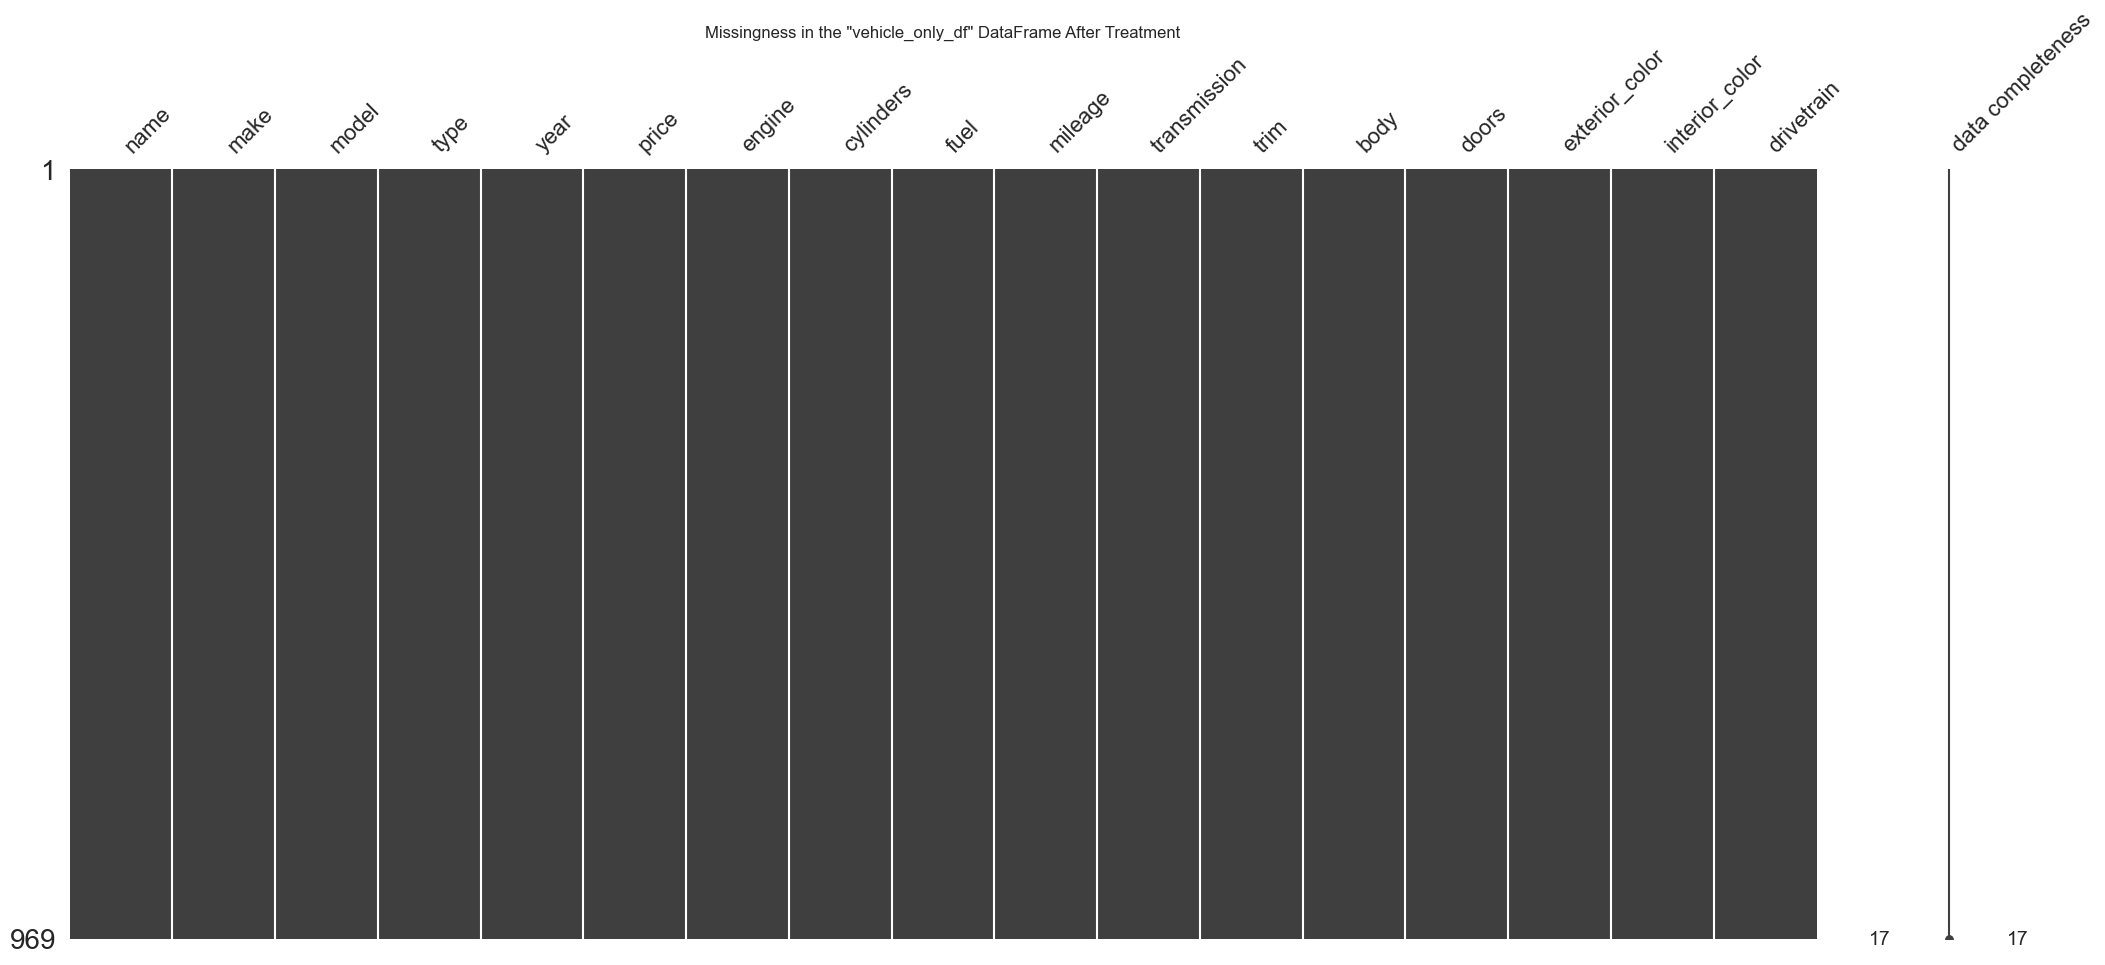

In [43]:
##-- Detection of missing values --##
print(f'Total count of missing values: {vehicle_only_df.isna().sum().sum()}')
print(vehicle_only_df.isna().sum())  # Generates the count of missing values per column.

##-- Visualization of missing values --##
print(f'Data Sparsity: {vehicle_only_df.isna().sum().sum() / (vehicle_only_df.shape[0] * vehicle_only_df.shape[1])}')
msno.matrix(vehicle_only_df, labels=True)
plt.title('Missingness in the "vehicle_only_df" DataFrame After Treatment')
plt.show()

## Detection of Outliers

In [54]:
##-- Create functions that visualize quantitative variable distribution --##
def outlier_counter(df, col):  # Counts rows that are determined to be outliers
    lower_quart = np.quantile(df[col], 0.25)
    upper_quart = np.quantile(df[col], 0.75)
    iqr = upper_quart - lower_quart
    lower_threshold = lower_quart - 1.5 * iqr
    upper_threshold = upper_quart + 1.5 * iqr
    outliers = df[(df[col] < lower_threshold) | (df[col] > upper_threshold)]
    return(f'---------- \n Total outliers from {col}: {outliers.shape[0]} \n Percentage of data: {(outliers.shape[0]/df.shape[0])*100}% \n')

def quantitative_visualizer(df, variable):  # Function that visualizes Boxplot and Histogram
    
    median = np.median(df[variable])
    mean = np.mean(df[variable])
    
    fig, ax = plt.subplots(figsize=(10, 3))
    
    ax.hist(df[variable], bins=10)
    ax.set_xlabel(outlier_counter(df, variable))
    
    ax2 = ax.twinx()
    ax2.boxplot(df[variable], vert=False)
    ax2.annotate(f'Median: {median}', xy=(median, 1.10))
    ax2.annotate(f'  Mean: {mean}', xy=(mean, 0.75), color='darkgreen')
    ax2.axvline(x=mean, color='darkgreen', linestyle='--', alpha=0.5)

    ax.set_title(f'Outlier Detection on {variable} Column')
    plt.show()


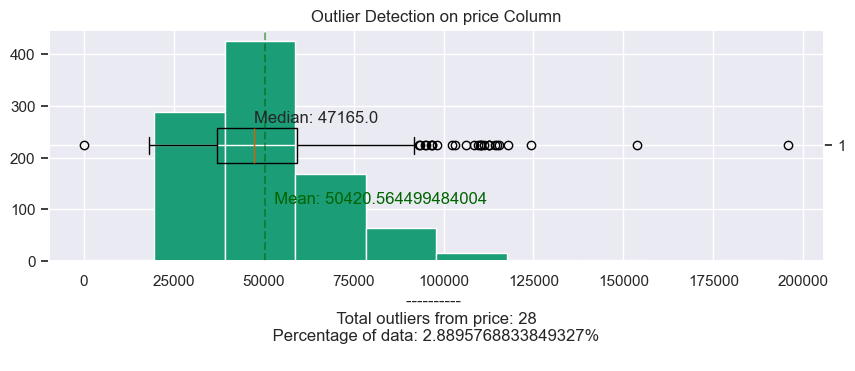

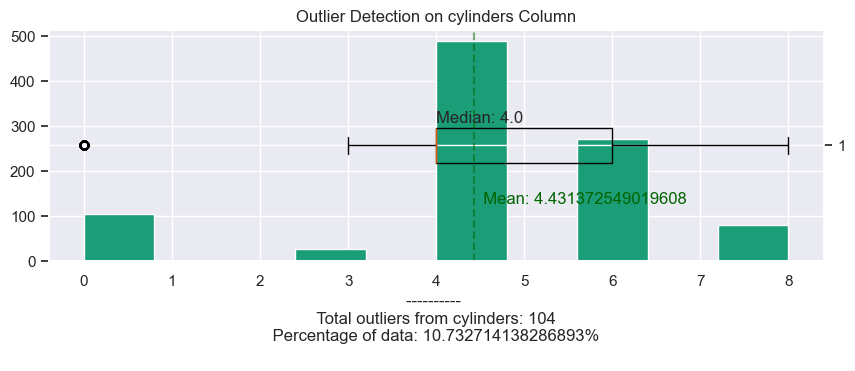

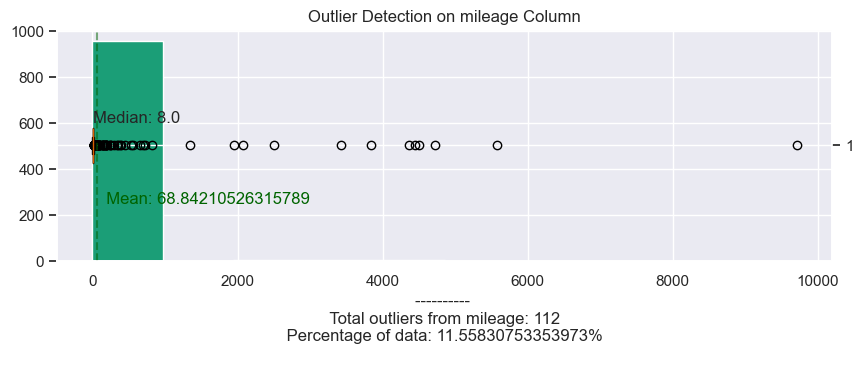

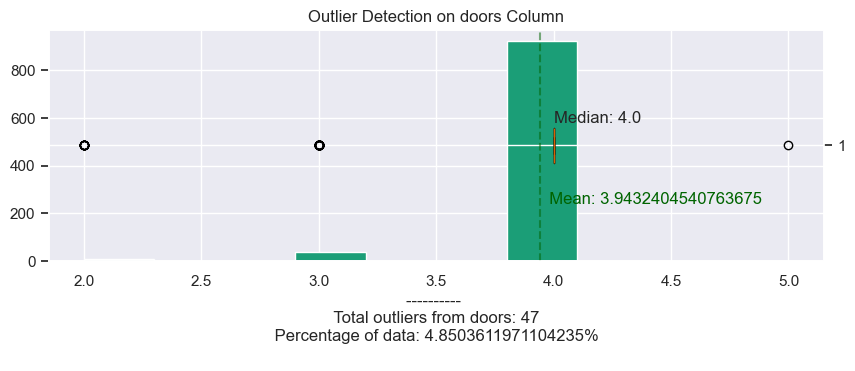

In [57]:
##-- Define quantitative variables --##
cols = [
    'price', 'cylinders', 'mileage', 'doors'
]

##-- Loop to generate visualizations on distrubutions --##
for var in cols:
    quantitative_visualizer(vehicle_only_df, var)